***
***
***

# Timed Unsupervised Learning Project

***
***
***

## Introduction
<br>
<b><big>Context</big></b><br>
Microsoft has decided to research consumer behavior of purchasing Windows or Mac using the perspective of the Big Five personality traits as well as the Hult DNA.<br>
<br>
<u>What are Big Five personality traits?</u><br> 
- Also known as the OCEAN model<br>
- Psychological broad domains which define human personality and account for individual differences<br>
- Consist of five aspects :<br>
<br>
1. <b>Openness</b>          : inventive/curious vs. consistent/cautious<br>
2. <b>Conscientiousness</b> : efficient/organized vs. easy-going/careless<br>
3. <b>Extraversion</b>      : outgoing/energetic vs. solitary/introvert<br>
4. <b>Agreeableness</b>     : friendly/compassionate vs. detached/distant<br>
5. <b>Neuroticism</b>       : sensitive/nervours vs. secure/confident<br>
<br>
Higher scores represent the former and lower scores represent the latter traits respectively.<br>
<br>
<u>What is Hult DNA?</u><br>
- A set of cognitive-behavioral and leadership skills<br>
- Consists of main three aspects with three types of skills :<br>
<br>
1. <b>Thinking</b><br>
- Shows Self-Awareness<br>
- Embraces Change<br>
- Demonstrates Dynamic Thinking<br>
<br>
2. <b>Communcating</b><br>
- Speaks & Listens Skillfully<br>
- Influences Confidently<br>
- Presents Ideas Effectively<br>
<br>
3. <b>Team Building</b><br>
- Fosters Collaborative Relationships<br>
- Inspires Productivity<br>
- Resolves Conflict Constructively<br>
<br>
<br>
<b><big>Dataset</big></b><br>
The dataset in this script demonstrates scores for <b>71 personality questions</b> answered by <b>392 observatios</b>, as well as <b>7</b> of their demographic information such as "Gender" and "Ethnicity".<br>
<br>
Score values range from 1 to 5 :<br>
1 -- Strongly disagree<br>
2 -- Disagree<br> 
3 -- Neutral<br>
4 -- Agree<br>
5 -- Strongly agree<br>
<br>
<br>
The demographic information related to each observation is as follows:<br>
<br>
<u>What laptop do you currently have?</u><br>
- Macbook<br>
- Windows laptop<br>
<br>
<u>What laptop would you buy in next assuming if all laptops cost the same?</u><br>
- Macbook<br>
- Windows laptop<br>
- Chromebook<br>
<br>
<u>What program are you in?</u><br>
- DD (MIB & Business Analytics)<br>      
- One year Business Analytics)<br>     
- DD (MBA & Business Analytics)<br>      
- DD (MBA & Disruptive innovation)<br>     
<br>
<u>What is your age?</u>
<br>
<br>
<u>Gender</u><br>
- Male<br>
- Female<br>
<br>
<u>What is your nationality?</u>
<br>
<br>
<u>What is your ethnicity?</u>

## Data Preparation 

In [1]:
# Import necessary packages for the analysis

import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [2]:
# Load "Survey_Data_Final_Exam.xlsx" 
survey_df = pd.read_excel("Survey_Data_Final_Exam.xlsx")


# Set print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [ ]:
survey_df.head()

Column names of demographic information was in a question format, we decided to rename them.

In [4]:
# Simplify the demographic information names 
survey_df.rename(columns = {"What laptop do you currently have?" : "Current_Laptop",
                            "What laptop would you buy in next assuming if all laptops cost the same?" : "Preferred_Future_Laptop",
                            "What program are you in?" : "School_Program",
                            "What is your age?" : "Age",
                            "What is your nationality? " : "Nationality",
                            "What is your ethnicity?" : "Ethnicity"},
                 inplace = True)

<big>NOTE</big><br>
We found that <b>a1147</b> answerd "MAC" for "What laptop do you currently have?" and "What laptop would you buy in next assuming if all laptops cost the same?", so we replaced it to "Macbook"<br>
<br>
Also, <b>a1147</b> did not answer "What is your ethnicity?", so we filled it with "Unknown"

In [5]:
# Replace "MAC" to "Macbook"
survey_df["Current_Laptop"] = survey_df["Current_Laptop"].replace("MAC", "Macbook")

survey_df["Preferred_Future_Laptop"] = survey_df["Preferred_Future_Laptop"].replace("MAC", "Macbook")


# Replace NaN to "Unknown"
survey_df["Ethnicity"] = survey_df["Ethnicity"].fillna("Unknown")

<big>NOTE</big><br>
We found that <b>a1388</b> answered "." for "What is your nationality?" so we replaced it to "Unknown"

In [6]:
survey_df["Nationality"] = survey_df["Nationality"].replace(".", "Unknown")



In this script, we used two user defined functions created by Professor Chase Kusterer from Hult International Business School.<br>
<br>
<b>inertia_plot</b> : helps to develop more candidates for the number of clusters we might want to develop<br>
<br>
<b>scree_plot</b> : visualizes the explained variance of each principal component to find the marginal return of explained variance, where the line connecting each principal component becomes less steep

In [7]:
########################################
# inertia
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

## Analysis with Big Five Personality Traits

### Step 1 : Dropping unnecessary columns 
<br>
Here, we went through these proccesses as follows:<br>
<br>
<b>1. DROP all of seven columns of demographic information and "surveyID"</b><br>
<br>
Our dataset contains both demographic data and quenstionnaire answers. Those different data concepts should not be mixed together in the same algorithm due to the high possibility of biasing the results of an analysis, we dropped all of seven columns of demographic information AND "surveyID" (because object cannot be scaled with other numeric values) from our dataset.<br>
<br>
<b>2. SPLIT the dataset to contain only Big Five personality traits questions</b>

In [8]:
# Drop demographic information and "surveyID"
personality_behavior = survey_df.drop(["surveyID",
                                       "Current_Laptop",
                                       "Preferred_Future_Laptop",
                                       "School_Program",
                                       "Age",
                                       "Gender",
                                       "Nationality",
                                       "Ethnicity"], axis = 1)


# Drop colum 50 to 71 in order to contain only features relevant to the Big Five personality traits 
big_five = personality_behavior.drop(personality_behavior.iloc[ : , 50:71], axis = 1)

### Step 2 : Calculate Big Five personality traits scores
In here, we calculated Big Five personality traits scores of all observations, and then we categorized all of the questions into five personality traits.<br>
<br>
Note that our caluculations are based on <a href = "https://openpsychometrics.org/printable/big-five-personality-test.pdf">this external resource</a>. 


In [9]:
# Create an empty DataFrame
ocean = pd.DataFrame()


#Calculate all personality traits scores
ocean['Openness'] = 8 + big_five.iloc[:, 4] - big_five.iloc[:, 9]\
+ big_five.iloc[:,14] - big_five.iloc[:,19]+ big_five.iloc[:,24]\
- big_five.iloc[:,29]+ big_five.iloc[:,34] + big_five.iloc[:,39]\
+ big_five.iloc[:,44] + big_five.iloc[:,49]         


ocean['Conscientiousness']  = 14 + big_five.iloc[:, 2] - big_five.iloc[:, 7]\
+ big_five.iloc[:,12] - big_five.iloc[:,17] + big_five.iloc[:,22]\
- big_five.iloc[:,27] + big_five.iloc[:,32] - big_five.iloc[:,37]\
+ big_five.iloc[:,42] + big_five.iloc[:,47]


ocean['Extroversion']  = 20 + big_five.iloc[:, 0] - big_five.iloc[:, 5]\
+ big_five.iloc[:,10] - big_five.iloc[:,15] + big_five.iloc[:,20]\
- big_five.iloc[:,25] + big_five.iloc[:,30] - big_five.iloc[:,35]\
+ big_five.iloc[:,40] - big_five.iloc[:,45]


ocean['Agreeableness']  = 14 - big_five.iloc[:,  1] + big_five.iloc[:,  6]\
- big_five.iloc[:, 11] + big_five.iloc[:, 16] - big_five.iloc[:, 21]\
+ big_five.iloc[:, 26] - big_five.iloc[:, 31] + big_five.iloc[:, 36]\
+ big_five.iloc[:, 41] + big_five.iloc[:, 46]


ocean['Neuroticism']  = 38 - big_five.iloc[:,  3] + big_five.iloc[:,  8]\
- big_five.iloc[:, 13] + big_five.iloc[:, 18] - big_five.iloc[:, 23]\
- big_five.iloc[:, 28] - big_five.iloc[:, 33] - big_five.iloc[:, 38]\
- big_five.iloc[:, 43] - big_five.iloc[:, 48]


# Check the results
ocean


,Openness,Conscientiousness,Extroversion,Agreeableness,Neuroticism
0,25,32,22,25,21
1,30,29,15,24,20
2,23,29,24,16,33
3,29,22,18,32,20
4,23,22,21,21,17
5,23,18,14,29,11
6,25,22,18,28,13
7,15,11,20,20,28
8,29,30,29,28,31
9,21,29,17,24,23


### Step 3 : Scale the data
Before we moved to PCA, we scaled the data.<br>
<br>
After scaling...<br>
- the mean of the values from each column O,C,E,A,N will be 0
- the standard deviation of the values from each column O,C,E,A,N will be 1

In [10]:
# Scale the data
scaler = StandardScaler()

scaler.fit(ocean)

X_scaled = scaler.transform(ocean)

# Convert scaled data into a DataFrame
ocean_scaled = pd.DataFrame(X_scaled)

# Reattach column names
ocean_scaled.columns = ocean.columns


# Check pre- and post-scaling variance
print(pd.np.var(ocean), '\n\n')
print(pd.np.var(ocean_scaled), '\n\n')

Openness             27.665530
Conscientiousness    30.985214
Extroversion         44.910291
Agreeableness        30.793361
Neuroticism          47.668680
dtype: float64 


Openness             1.0
Conscientiousness    1.0
Extroversion         1.0
Agreeableness        1.0
Neuroticism          1.0
dtype: float64 




C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Step 4 : Principal Component Analysis
Our process here comprises 5 steps as follows : 
1. Develop a PCA model with no limit to principal components
2. Analyze the explained_variance_ratio and the scree plot
3. Decide how many components to retain
4. Build a new model with a limited number of principal components
5. Interpret what each PC represents

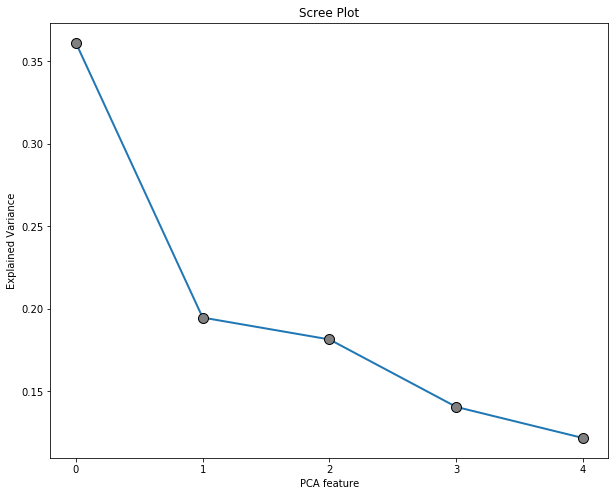

In [11]:
# Instantiate a PCA with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# Fit and transform "purchase_scaled"
ocean_pca = pca.fit_transform(ocean_scaled)


# Call the scree_plot function on "pca"
scree_plot(pca)

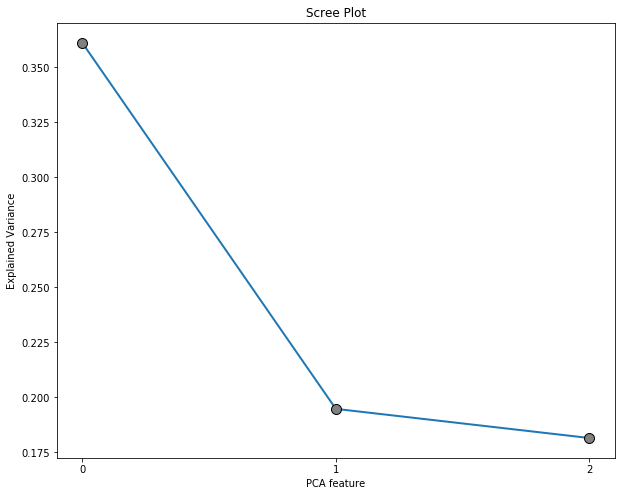

In [12]:
# Instantiate a new model using the three principal components
pca_2 = PCA(n_components = 3,
            random_state = 802)


# Fit and TRANSFORMING the purchases_scaled
ocean_pca_2 = pca_2.fit_transform(ocean_scaled)


# Call the scree_plot function
scree_plot(pca_2)

<big>NOTE</big><br>
<br>
Although we could see a drastic drop from having one component to two, and it looked like an elbow (= where margina return on variance can be seen), we decided to keep <b>THREE</b>, because two components might give us extreme results that might lead to misinterpretation. 

In [13]:
# Transpose pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_2.components_))



factor_loadings_df = factor_loadings_df.set_index(ocean_scaled.columns).round(2)


# Check the results
factor_loadings_df

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,0,1,2
Openness,-0.50,0.21,0.24
Conscientiousness,-0.49,-0.35,0.46
Extroversion,-0.39,0.38,-0.72
Agreeableness,-0.51,0.30,0.15
Neuroticism,-0.31,-0.77,-0.44


In [14]:
# Name each principal component
factor_loadings_df.columns = ["Conservative_Loner",
                             "Socially_Outgoing",
                             "Introvert_Perfectionist"]


# Check the results
factor_loadings_df


# Saving to Excel
factor_loadings_df.to_excel('ocean_factor_loadings.xlsx')

Here, we transformed the data with three principal components to analyze factor strengths per observation, whihch means how strong the association per observation with each principal component is. 

In [15]:
# Transform the data with reduced number of principal components
ocean_reduced = pca_2.transform(ocean_scaled)


# Convert to a DataFrame
ocean_reduced_df = pd.DataFrame(ocean_reduced)


# Name each principal component
ocean_reduced_df.columns = ["Conservative_Loner",
                             "Socially_Outgoing",
                             "Introvert_Perfectionist"]


# Check the results
ocean_reduced_df.head(n = 10)

,Conservative_Loner,Socially_Outgoing,Introvert_Perfectionist
0,-0.028894,-0.360299,0.188437
1,0.299141,-0.308343,0.957812
2,0.593686,-1.964294,-1.369120
3,0.094499,0.696318,0.225590
4,1.640661,0.363863,-0.469595
5,1.933548,1.319595,0.546064
6,1.161179,1.099029,0.384066
7,3.020929,-0.606478,-2.363572
8,-1.373695,-0.626535,-1.103061
9,0.910072,-0.896164,0.140005


### Step 5 : Rescale the data for clustering
In here, our goal was to develop an idea as to how many clusters would be appropriate given our analysis, and then to apply this number of clusters to a k-Means model.

Before getting started, we rescaled our data because the variance among our features in "ocean_reduced_df" was no longer equal.

In [16]:
# Instantiate StandardScaler()
scaler = StandardScaler()


# Fit and transform our data
X_scaled = scaler.fit_transform(ocean_reduced_df)


# Convert scaled data into a DataFrame
ocean_reduced_scaled = pd.DataFrame(X_scaled)


# Reattach column names
ocean_reduced_scaled.columns = ["Conservative_Loner",
                                "Socially_Outgoing",
                                "Introvert_Perfectionist"]


# checking pre- and post-scaling variance
print(pd.np.var(ocean_reduced_df), '\n\n')
print(pd.np.var(ocean_reduced_scaled))

Conservative_Loner         1.806234
Socially_Outgoing          0.973863
Introvert_Perfectionist    0.907584
dtype: float64 


Conservative_Loner         1.0
Socially_Outgoing          1.0
Introvert_Perfectionist    1.0
dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Step 6 : Agglomerative Clustering
Agglomerative clustering starts where each observation is its own cluster. From there, it links observations based on distance.<br>
Here, we used a method called "ward", which groups observations into clusters in a way that minimizes the variance among all clusters. It leads to clusters that are relatively equal in size. 

First we created a dendrogram to understand visually how many clusters to build using k-Means.

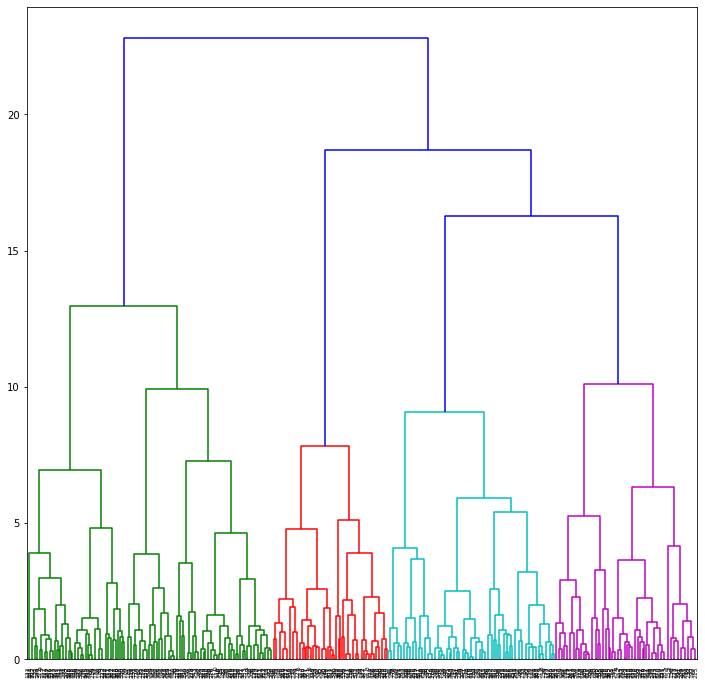

In [17]:
# Group data based on Ward distance
standard_mergings_ward = linkage(y = ocean_reduced_scaled,
                                 method = 'ward')


# Set plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# Save and displa the plot
#plt.savefig('ocean_standard_hierarchical_clust_ward.png')
plt.show()

Then we analyzed the inertia plot to develop more candidates for the number of clusters we might want to develop.

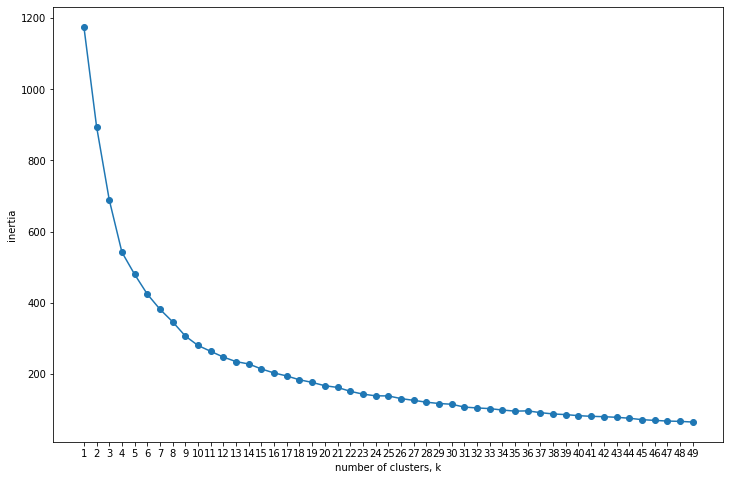

In [18]:
# Call the inertia_plot() function
inertia_plot(ocean_reduced_scaled)

<big>NOTE</big>
- We can slightly see that the slope gets relatively gentle at <b>FOUR</b>.
- We decided to use four clusters

In [19]:
# Instantiate a k-Means object with four clusters
ocean_k = KMeans(n_clusters = 4,
                 random_state = 802)


# Fit the object to the data
ocean_k.fit(ocean_reduced_scaled)


# Convert the clusters to a DataFrame
ocean_kmeans = pd.DataFrame({'BigFive_Cluster': ocean_k.labels_})


# Check the results
ocean_kmeans.iloc[: , 0].value_counts()

3    126
0     96
1     92
2     78
Name: BigFive_Cluster, dtype: int64

Here, we displayed the centroids (mean values) for each cluster.

In [20]:
# Store cluster centers
ocean_centroids = ocean_k.cluster_centers_


# Convert cluster centers into a DataFrame
ocean_centroids_df = pd.DataFrame(ocean_centroids)


# Reattach PC names
ocean_centroids_df.columns = ["Conservative_Loner",
                              "Socially_Outgoing",
                              "Introvert_Perfectionist"]


# Check results
ocean_centroids_df.round(2)

,Conservative_Loner,Socially_Outgoing,Introvert_Perfectionist
0,0.99,-0.24,-0.74
1,-0.02,-0.85,0.99
2,0.35,1.20,0.73
3,-0.96,0.06,-0.61


<big>NOTE</big><br>
<br>
Centroid = the mean of each group<br>
- Cluster 0 : a group of conservative and not sociable behavior
- Cluster 1 : a group of dedicated and neat behavior
- Cluster 2 : a group of extrovert and energetic behavior
- Cluster 3 : a group of sociable and open minded behavior


Finally, we concatenated demographic information and PCA components into one DataFrame.

In [21]:
# Concatenate cluster dataframe with the initial data with reduced features
ocean_clst_df = pd.concat([ocean_kmeans,
                           ocean_reduced_df.round(2)],
                           axis = 1)


# Concatenate the demographic information with "ocean_clst_df"
final_ocean_clst_df = pd.concat([survey_df.loc[ : , ["surveyID",
                                                     "Current_Laptop",
                                                     "Preferred_Future_Laptop",
                                                     "School_Program",
                                                     "Age",
                                                     "Gender",
                                                     "Nationality",
                                                     "Ethnicity"]], ocean_clst_df], axis = 1)

# Rename clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}


final_ocean_clst_df['BigFive_Cluster'].replace(cluster_names, inplace = True)


final_survey_df = final_ocean_clst_df


# Check the results
final_survey_df

,surveyID,Current_Laptop,Preferred_Future_Laptop,School_Program,Age,Gender,Nationality,Ethnicity,BigFive_Cluster,Conservative_Loner,Socially_Outgoing,Introvert_Perfectionist
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 2,-0.03,-0.36,0.19
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 2,0.30,-0.31,0.96
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 1,0.59,-1.96,-1.37
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 3,0.09,0.70,0.23
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 1,1.64,0.36,-0.47
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 3,1.93,1.32,0.55
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 3,1.16,1.10,0.38
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Cluster 1,3.02,-0.61,-2.36
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 4,-1.37,-0.63,-1.10
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 2,0.91,-0.90,0.14


*********************************************************************************************************

## Analysis with Hult DNA

### Step 1 : Dropping unnecessary columns 
<br>
Here, we again went through these proccesses as follows:<br>
<br>
<b>1. DROP all of seven columns of demographic information and "surveyID"</b><br>
<br>
Our dataset contains both demographic data and quenstionnaire answers. Those different data concepts should not be mixed together in the same algorithm due to the high possibility of biasing the results of an analysis, we dropped all of seven columns of demographic information AND "surveyID" (because object cannot be scaled with other numeric values) from our dataset.<br>
<br>
<b>2. SPLIT the dataset to contain only Hult DNA questions this time</b>

In [22]:
# Drop demographic information and "surveyID"
personality_behavior = survey_df.drop(["surveyID",
                                       "Current_Laptop",
                                       "Preferred_Future_Laptop",
                                       "School_Program",
                                       "Age",
                                       "Gender",
                                       "Nationality",
                                       "Ethnicity"], axis = 1)


hult = personality_behavior.iloc[:, 50:71]

hult = hult.drop(hult.iloc[ : , 4:7], axis = 1)

### Step 2 : Reverse scores 
There were two questions with negative form on Hult DNA questionnare.
- Don't  generate ideas that are new and different
- Don't persuasively sell a vision or idea

The answers for these questions were in a <b>reversed scale</b>, which means 1 represents "5 - Strongly Agree" and 5 represents "1 - Strongly Disagree". Therefore, we replaced 1, 2, 4, 5 for these columns to 5, 4, 2, 1 respectively. 3 represents "Neutral" so it remains the same. 

In [23]:
# Replace 1, 2, 4, 5, to 5, 4, 2, 1
hult["Don\'t  generate ideas that are new and different"] = hult["Don\'t  generate ideas that are new and different"].replace([1, 2, 4, 5], [5, 4, 2, 1])

hult["Don\'t persuasively sell a vision or idea"] = hult["Don\'t persuasively sell a vision or idea"].replace([1, 2, 4, 5], [5, 4, 2, 1])


### Step 3 : Calculate Hult DNA scores
Here, we simply aggregated the average scores of all observations for each Hult DNA aspects.<br>
<br>
We added all the scores from six questions and devided them by six to determine the average scores of the observations.<br>
<br>
<b>Note :</b> We manually went through all 18 questions of Hult DNA and assigned six best fit questions per each aspect. 

In [24]:
# Create an empty DataFrame
hult_dna = pd.DataFrame()


# Calculate the mean of scores of each features
hult_dna['Thinking']  = ((hult.iloc[:, 0] + hult.iloc[:, 1] + hult.iloc[:, 2] + hult.iloc[:, 3] + hult.iloc[:, 13] + hult.iloc[:, 17]) / 6).round(2)

hult_dna['Communicating']  = ((hult.iloc[:, 4] + hult.iloc[:, 6] + hult.iloc[:, 7] + hult.iloc[:, 8] + hult.iloc[:, 11] + hult.iloc[:, 15]) / 6).round(2)
 
hult_dna['Team_Building']  = ((hult.iloc[:, 5] + hult.iloc[:, 9] + hult.iloc[:, 10] + hult.iloc[:, 12] + hult.iloc[:, 14] + hult.iloc[:, 16]) / 6).round(2)

hult_dna.head(10)

,Thinking,Communicating,Team_Building
0,4.00,3.83,3.67
1,3.83,4.33,4.17
2,4.00,3.67,2.67
3,3.67,4.33,4.83
4,3.33,3.33,3.17
5,3.67,3.50,3.00
6,4.33,4.17,4.17
7,3.83,4.50,4.67
8,4.17,3.83,3.50
9,3.67,3.83,3.50


### Step 4 : Scale the data
Before we moved to PCA, we scaled the data.<br>
<br>
After scaling...<br>
- the mean of the values from each column "Thinking", "Communicating" and "Team Building" will be 0
- the standard deviation of the values from each column "Thinking", "Communicating" and "Team Building" will be 1

In [25]:
# Scale the data
scaler = StandardScaler()


# Fit the data in scaler
scaler.fit(hult_dna)


# Transform the data
X_scaled = scaler.transform(hult_dna)


# Convert scaled data into a DataFrame
hult_scaled = pd.DataFrame(X_scaled)


# Reattach column names
hult_scaled.columns = hult_dna.columns


# Check pre- and post-scaling variance
print(pd.np.var(hult_dna), '\n\n')
print(pd.np.var(hult_scaled), '\n\n')

Thinking         0.259291
Communicating    0.226270
Team_Building    0.233275
dtype: float64 


Thinking         1.0
Communicating    1.0
Team_Building    1.0
dtype: float64 




C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Step 5 : Principal Component Analysis
Our process here comprises 5 steps as follows : 
1. Develop a PCA model with no limit to principal components
2. Analyze the explained_variance_ratio and the scree plot
3. Decide how many components to retain
4. Build a new model with a limited number of principal components
5. Interpret what each PC represents

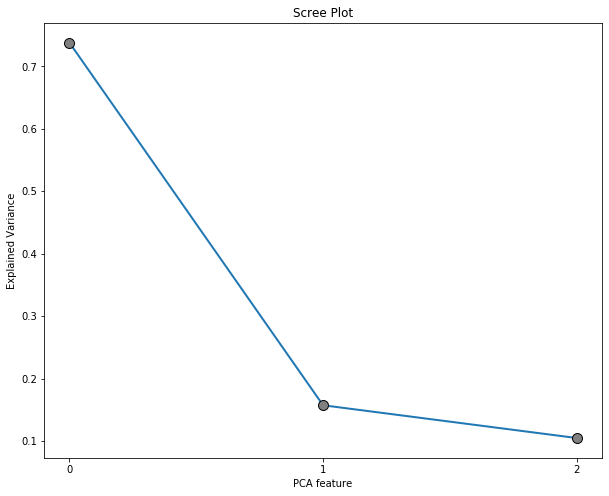

In [26]:
# Instantiate a PCA with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# Fit and transform "purchase_scaled"
hult_pca = pca.fit_transform(hult_scaled)


# Call the scree_plot function on "pca"
scree_plot(pca)

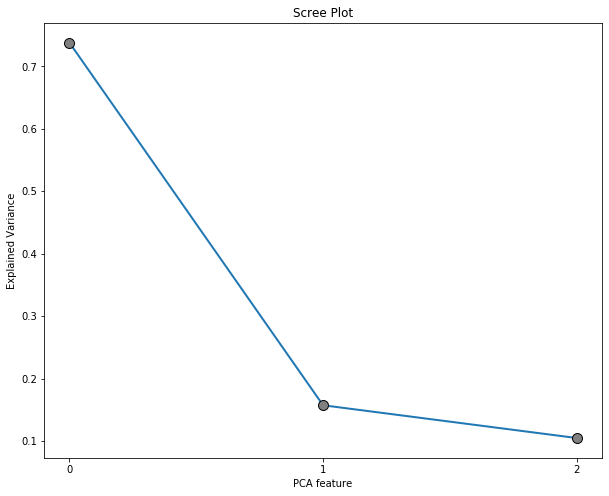

In [27]:
# Instantiate a PCA with no limit to principal components
pca_3 = PCA(n_components = 3,
            random_state = 802)


# Fit and transform "purchase_scaled"
pca_3.fit_transform(hult_scaled)


# Call the scree_plot function on "pca"
scree_plot(pca_3)

<big>NOTE</big>
- Even though we could see an elbow by having two principal components, we decided to use all of the features because we only have three features.   

In [28]:
# Transport pca components
hult_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_3.components_))


# Name rows as original features
hult_factor_loadings_df = hult_factor_loadings_df.set_index(hult_scaled.columns).round(2)


# Check the results
hult_factor_loadings_df

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,0,1,2
Thinking,-0.56,-0.75,0.35
Communicating,-0.60,0.07,-0.80
Team_Building,-0.57,0.66,0.49


In [29]:
# Name each principal component
hult_factor_loadings_df.columns = ["Closed_Mindset",
                                   "Team_Management",
                                   "Inefficient_in_Communication"]



# Save to Excel
hult_factor_loadings_df.to_excel('hult_factor_loadings.xlsx')

Here, we transformed the data with three principal components to analyze factor strengths per observation, whihch means how strong the association per observation with each principal component is. 

In [30]:
# Transform the data with three PCs
hult_reduced = pca_3.transform(hult_scaled)


# Convert to a DataFrame
hult_reduced_df = pd.DataFrame(hult_reduced)


# Reattach PCs names
hult_reduced_df.columns = ["Closed_Mindset",
                           "Team_Management",
                           "Inefficient_in_Communication"]


# Check the results
hult_reduced_df.head(n = 20)

,Closed_Mindset,Team_Management,Inefficient_in_Communication
0,0.132506,-0.139176,0.013916
1,-0.901509,0.870015,-0.433716
2,1.514696,-1.528720,-0.733504
3,-1.504235,2.006023,0.125085
4,2.091691,0.086147,-0.122661
5,1.703268,-0.619439,-0.343383
6,-1.250241,0.110584,0.181879
7,-1.706209,1.578624,-0.210672
8,0.145908,-0.621058,-0.040447
9,0.696604,0.113771,-0.388191


### Step 6 : Rescale the data for clustering
In here, our goal was to develop an idea as to how many clusters would be appropriate given our analysis, and then to apply this number of clusters to a k-Means model.

Before getting started, we rescaled our data because the variance among our features in "hult_reduced_df" was no longer equal.

In [31]:
# Instantiate StandardScaler()
scaler = StandardScaler()


# Fit and transform "hult_reduced_df"
X_scaled = scaler.fit_transform(hult_reduced_df)


# Convert scaled data into a DataFrame
hult_reduced_scaled = pd.DataFrame(X_scaled)


# Reattach the column names
hult_reduced_scaled.columns = ["Closed_Mindset",
                               "Team_Management",
                               "Inefficient_in_Communication"]


# Check pre- and post-scaling variance
print(pd.np.var(hult_reduced_df), '\n\n')
print(pd.np.var(hult_reduced_scaled))

Closed_Mindset                  2.213331
Team_Management                 0.472044
Inefficient_in_Communication    0.314625
dtype: float64 


Closed_Mindset                  1.0
Team_Management                 1.0
Inefficient_in_Communication    1.0
dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Step 7 : Agglomerative Clustering
Agglomerative clustering starts where each observation is its own cluster. From there, it links observations based on distance.<br>
Here, we used a method called "ward", which groups observations into clusters in a way that minimizes the variance among all clusters. It leads to clusters that are relatively equal in size. 

We first created a dendrogram to understand how many clusters to build using k-Means.

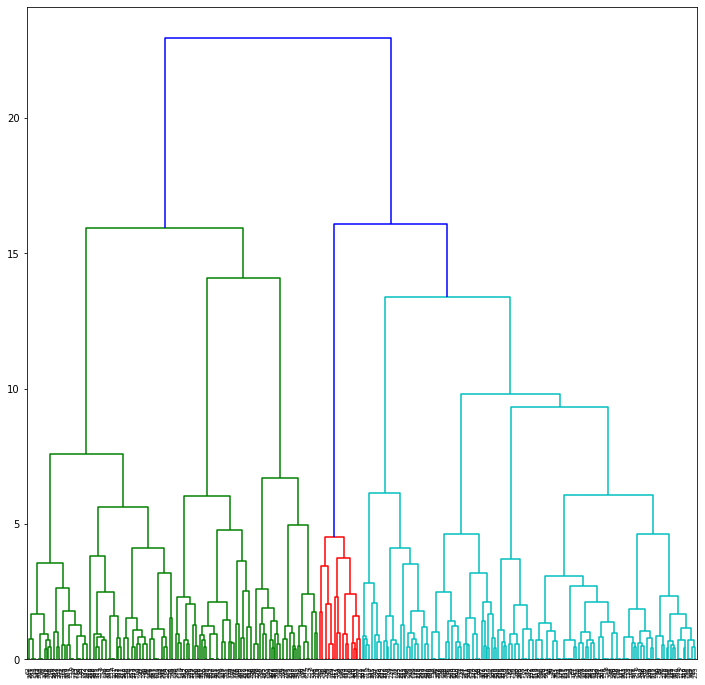

In [32]:
# Group data based on Ward distance
standard_mergings_ward = linkage(y = hult_reduced_scaled,
                                 method = 'ward')


# Set plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# Save and display the plot
#plt.savefig('hultdna_hierarchical_clustering.png')
plt.show()

Then we analyzed the inertia plot to develop more candidates for the number of clusters we might want to develop.

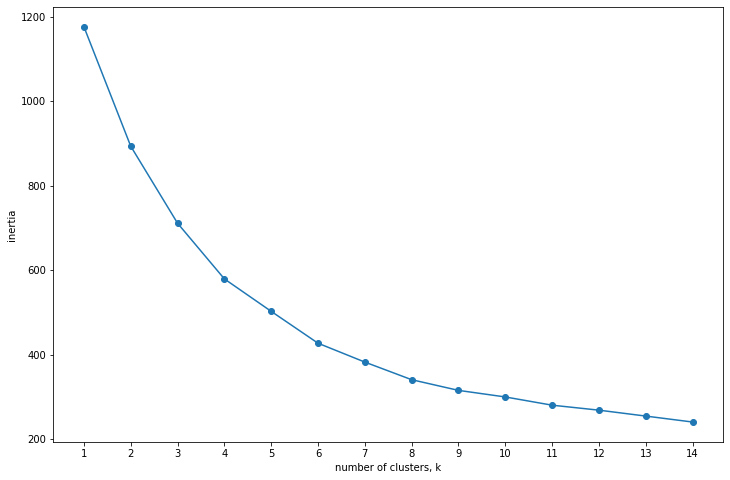

In [33]:
inertia_plot(hult_reduced_scaled, max_clust = 15)

<big>NOTE</big>
- the slope of inertia plot gets slightly at <b>FOUR</b>

In [34]:
# Instantiate a k-Means object with four clusters
hult_k = KMeans(n_clusters = 4,
                random_state = 802)


# Fit the object to the data
hult_k.fit(hult_reduced_scaled)


# Convert the clusters to a DataFrame
hult_kmeans = pd.DataFrame({'HultDNA_Cluster': hult_k.labels_})


# Check the results
hult_kmeans.iloc[: , 0].value_counts()

1    142
0     93
2     82
3     75
Name: HultDNA_Cluster, dtype: int64

Then we displayed the centroids (mean values) for each cluster.

In [35]:
# Store cluster centers
hult_centroids = hult_k.cluster_centers_


# Convert cluster centers into a DataFrame
hult_centroids_df = pd.DataFrame(hult_centroids)


# Rename principal components
hult_centroids_df.columns = ["Closed_Mindset",
                             "Team_Management",
                             "Inefficient_in_Communication"]


# checking results (clusters = rows, pc = columns)
hult_centroids_df.round(2)

,Closed_Mindset,Team_Management,Inefficient_in_Communication
0,1.24,0.19,-0.14
1,-0.37,-0.90,-0.11
2,-0.47,0.40,1.23
3,-0.32,1.02,-0.97


<big>NOTE</big><br>
<br>
Centroid = the mean of each group<br>
- Cluster 0 : a group of closed mindset behavior, can be reluctant to changes
- Cluster 1 : a group of being bad at collaborate in a team, showing relatively lower suitability for leadership
- Cluster 2 : a group of open minded behavior, yet not very efficient in communication
- Cluster 3 : a group of leardership behavior


Finally, we concatenated demographic information and PCA components into one DataFrame.

In [36]:
# Concatenate the column "HultDNA_Cluster" with the Hult DNA PCs
hult_clst_df = pd.concat([hult_kmeans,
                          hult_reduced_df.round(2)],
                          axis = 1)


# Rename clusters 
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}


# Rename cluster names 
hult_clst_df['HultDNA_Cluster'].replace(cluster_names, inplace = True)


# Concatenate Hult DNA clusters and PCs with Big Five data and demographic data
# This is the final complete dataset 
final_survey_df = pd.concat([final_survey_df,
                             hult_clst_df], axis = 1)



In [37]:
# Check the final dataset
final_survey_df

,surveyID,Current_Laptop,Preferred_Future_Laptop,School_Program,Age,Gender,Nationality,Ethnicity,BigFive_Cluster,Conservative_Loner,Socially_Outgoing,Introvert_Perfectionist,HultDNA_Cluster,Closed_Mindset,Team_Management,Inefficient_in_Communication
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 2,-0.03,-0.36,0.19,Cluster 2,0.13,-0.14,0.01
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 2,0.30,-0.31,0.96,Cluster 4,-0.90,0.87,-0.43
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 1,0.59,-1.96,-1.37,Cluster 2,1.51,-1.53,-0.73
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 3,0.09,0.70,0.23,Cluster 4,-1.50,2.01,0.13
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 1,1.64,0.36,-0.47,Cluster 1,2.09,0.09,-0.12
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 3,1.93,1.32,0.55,Cluster 1,1.70,-0.62,-0.34
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 3,1.16,1.10,0.38,Cluster 3,-1.25,0.11,0.18
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Cluster 1,3.02,-0.61,-2.36,Cluster 4,-1.71,1.58,-0.21
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 4,-1.37,-0.63,-1.10,Cluster 2,0.15,-0.62,-0.04
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 2,0.91,-0.90,0.14,Cluster 1,0.70,0.11,-0.39


## Visualize box plots  to analyze the distribution of the data

Explore using box plots to see if there are any insights can be found.<br>
<br>
We created a user defined function called <b>box</b> to create box plots.

In [38]:
def box(horizontal_data, vertical_data, color, data):
    """
PARAMETERS
----------
horizontal_data : data goes to x-axis
vertical_data   : data goes to y-axis
color           : how you want to color based on the data 
data            : which data you want to use? 
    """
        
    fig, ax = plt.subplots(figsize = (12, 12))
    sns.boxplot(x = horizontal_data,
                y = vertical_data,
                hue = color,
                data = data)
    plt.tight_layout()
    plt.show()

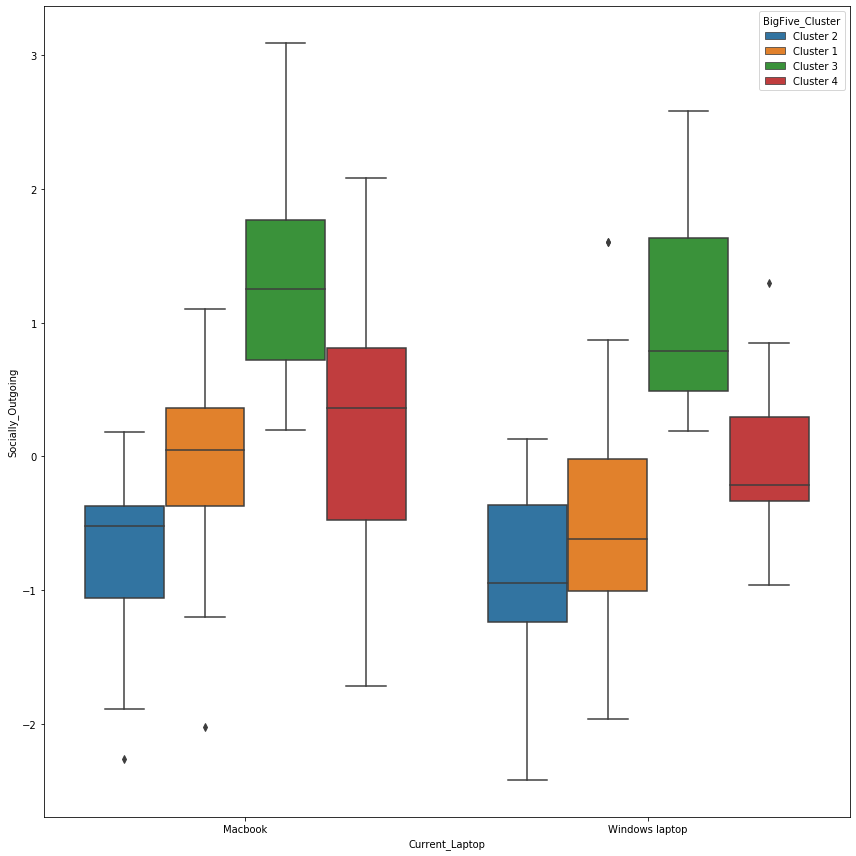

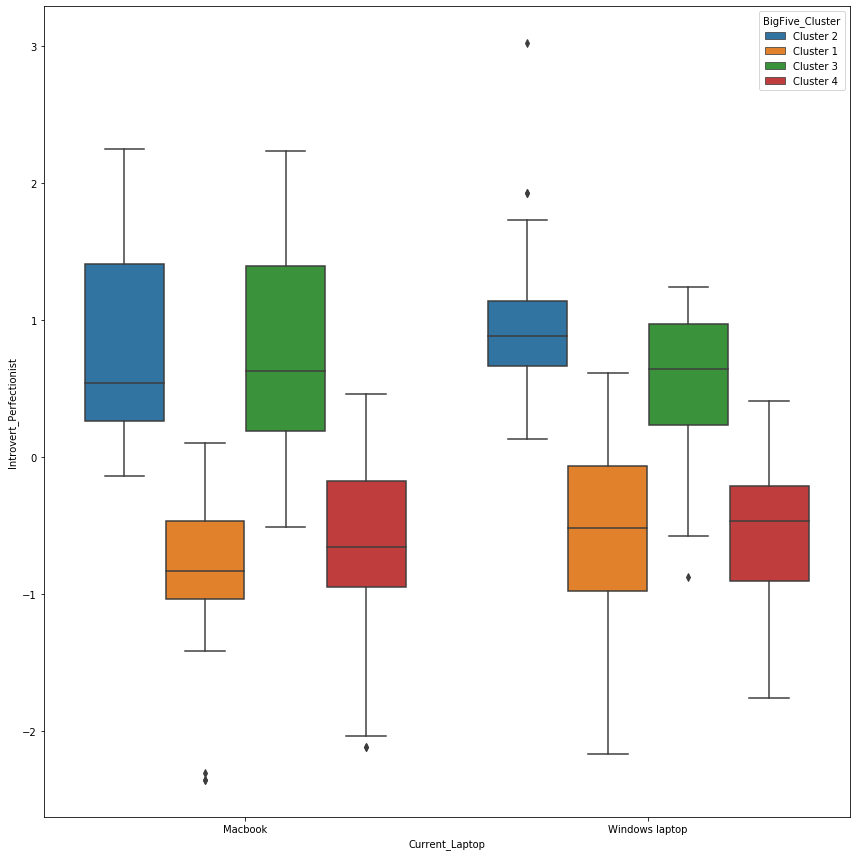

In [39]:
##################
# Current Laptop
##################


#box("Current_Laptop", "Conservative_Loner", "BigFive_Cluster", final_survey_df)
box("Current_Laptop", "Socially_Outgoing", "BigFive_Cluster", final_survey_df)
box("Current_Laptop", "Introvert_Perfectionist", "BigFive_Cluster", final_survey_df)

- Cluster 1 (Orange) : positive values in "Conservative Loner", relatively negative for both "Socially Outgoing" and "Introvert_Perfectionist"
- especially negative values for windows users in introvert_perfectionist 
- Cluster 2 (Blue) : positive values in "Introvert_Perfectionist", and negative values in "Socially Outgoing"
- Cluster 4 (Red) : negative values in "Conservative Loner"<br>
<br>
- Cluster 1 : a group of conservative and not sociable behavior
- Cluster 2 : a group of dedicated and neat behavior
- Cluster 3 : a group of extrovert and energetic behavior
- Cluster 4 : a group of sociable and open minded behavior


In [40]:
final_survey_df.columns

Index(['surveyID', 'Current_Laptop', 'Preferred_Future_Laptop', 'School_Program', 'Age', 'Gender', 'Nationality', 'Ethnicity', 'BigFive_Cluster', 'Conservative_Loner', 'Socially_Outgoing', 'Introvert_Perfectionist', 'HultDNA_Cluster', 'Closed_Mindset', 'Team_Management', 'Inefficient_in_Communication'], dtype='object')

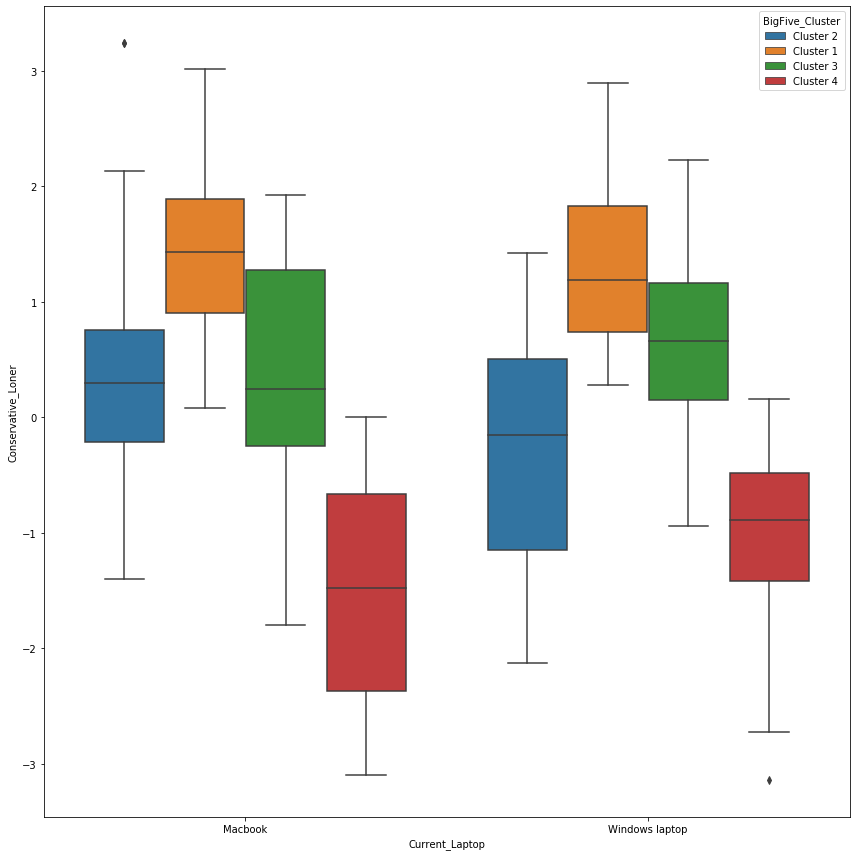

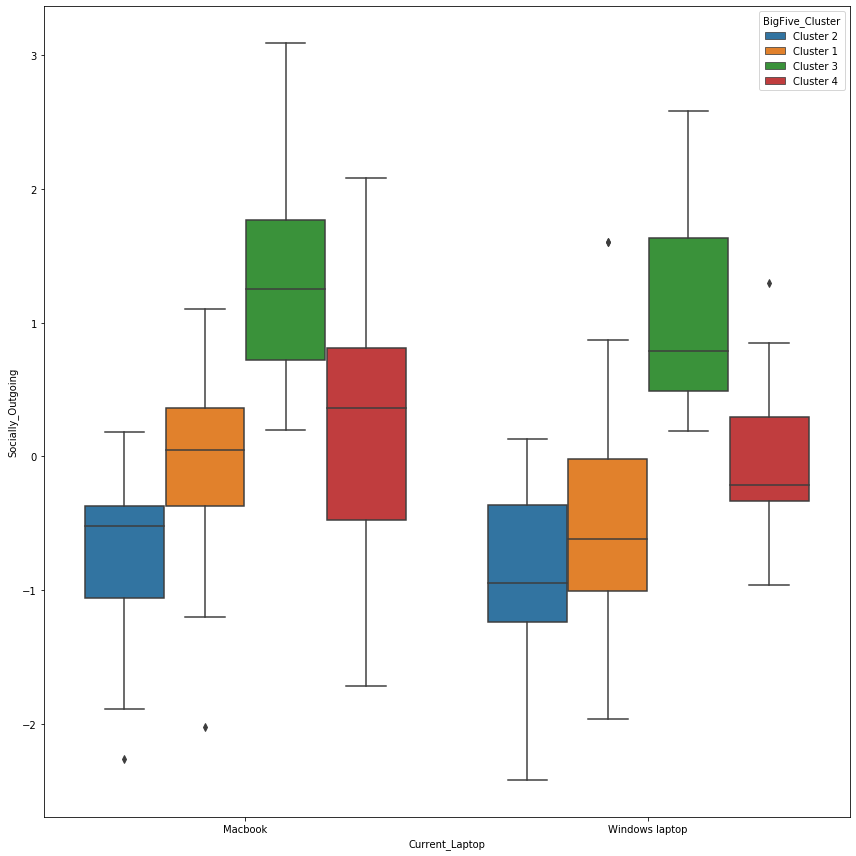

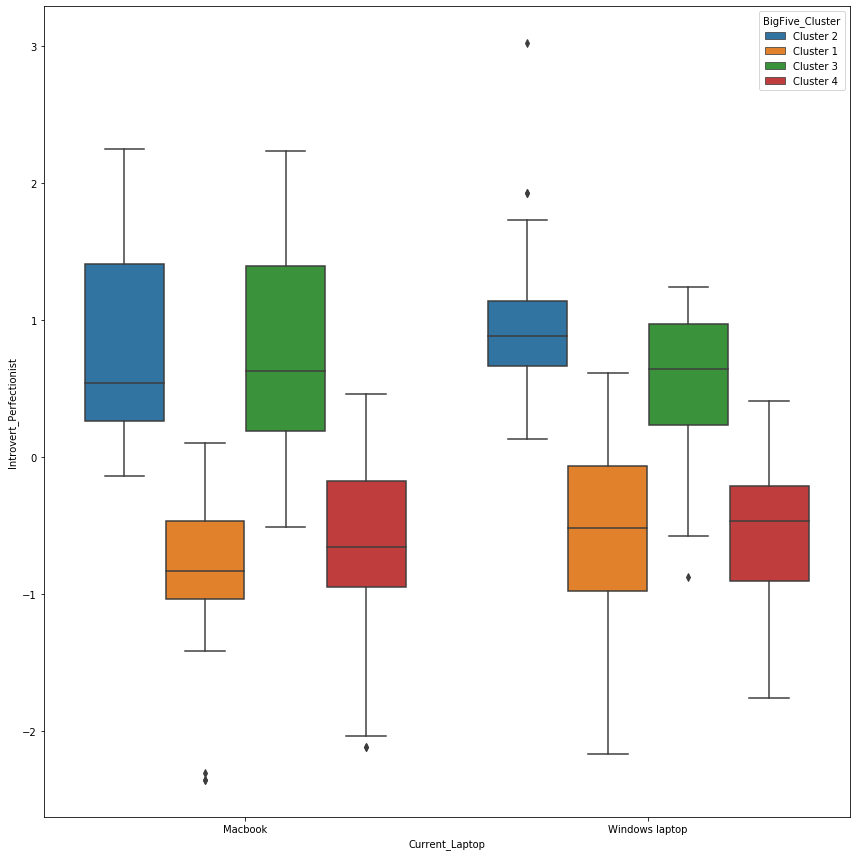

In [47]:
box("Current_Laptop", "Conservative_Loner", "BigFive_Cluster", final_survey_df)
box("Current_Laptop", "Socially_Outgoing", "BigFive_Cluster", final_survey_df)
box("Current_Laptop", "Introvert_Perfectionist", "BigFive_Cluster", final_survey_df)

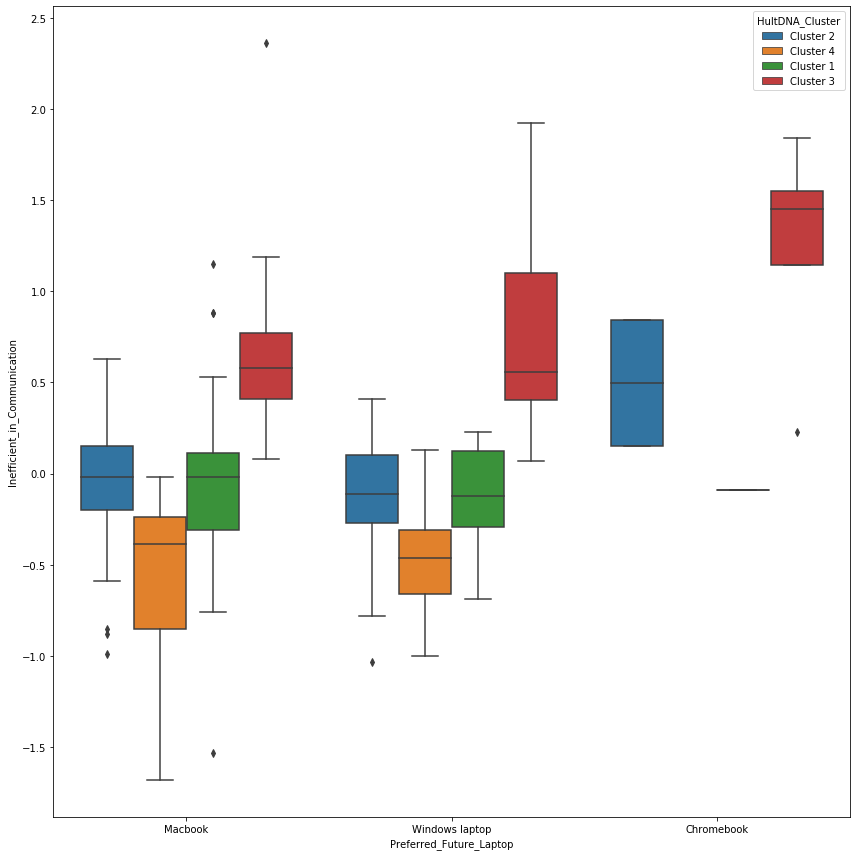

In [45]:
##################
# Future Laptop
##################

#box("Preferred_Future_Laptop", "Closed_Mindset", "HultDNA_Cluster", final_survey_df)
#box("Preferred_Future_Laptop", "Team_Management", "HultDNA_Cluster", final_survey_df)
box("Preferred_Future_Laptop", "Inefficient_in_Communication", "HultDNA_Cluster", final_survey_df)

- Cluster 3 and 2 showing interests in buying Chromebook in the future 
- high scores in inefficient in communication 
- lower scores in team_managmenet 
- Cluster 3 : positive scores on both closed_mindset, relatively smaller number in team_management 


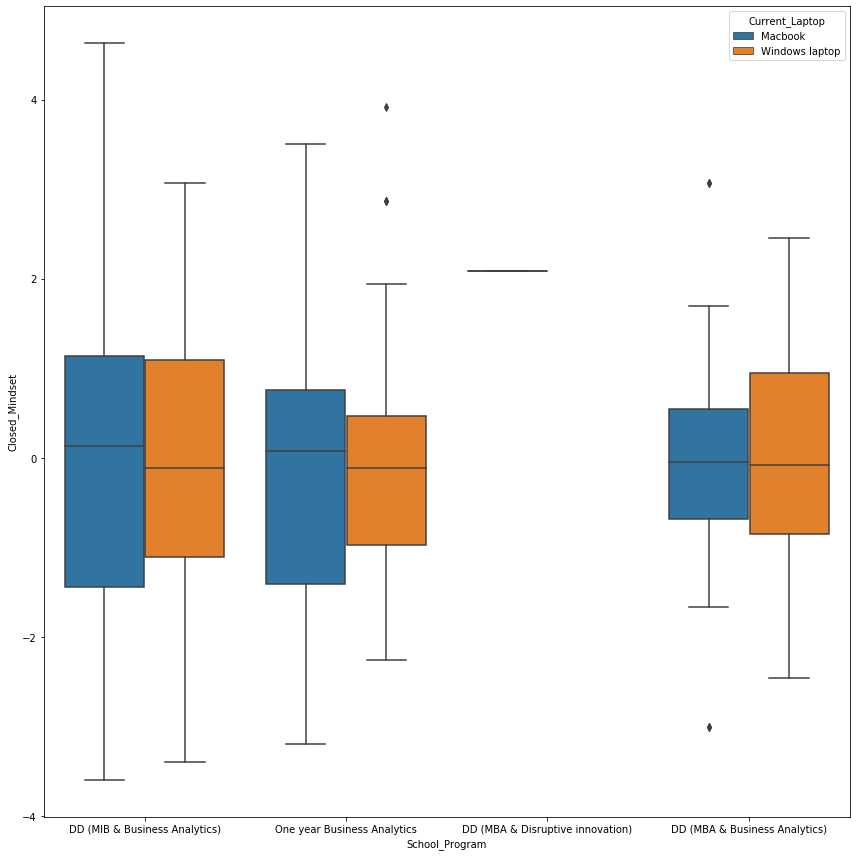

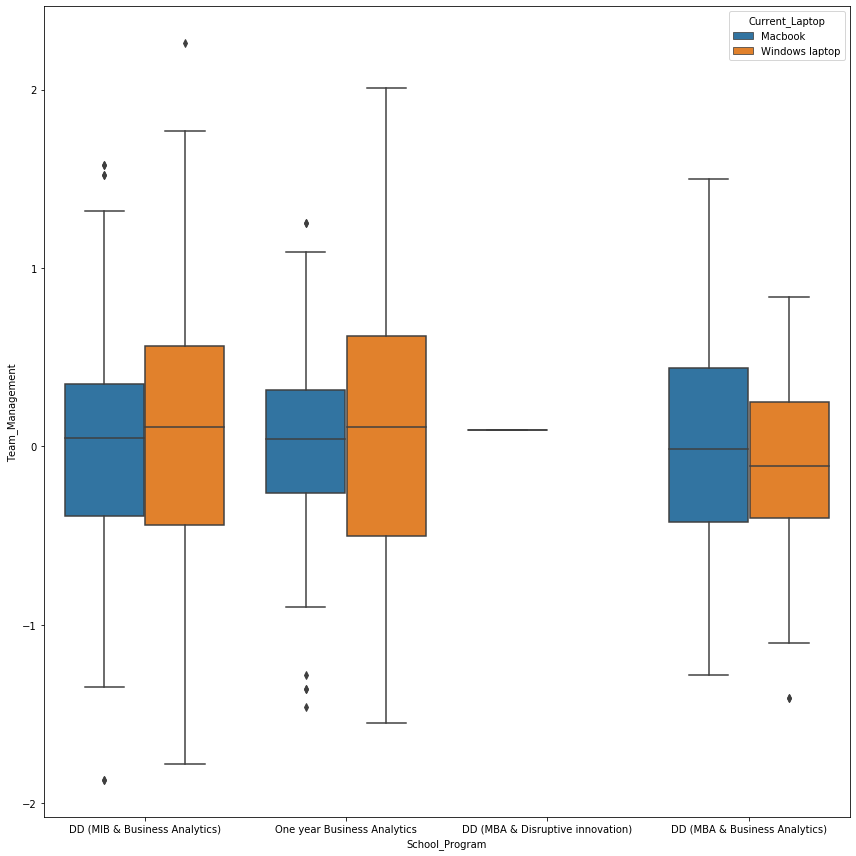

In [49]:
#############################
# Program vs. CUrrent Laptop 
#############################

box("School_Program", "Closed_Mindset", "Current_Laptop", final_survey_df)
box("School_Program", "Team_Management", "Current_Laptop", final_survey_df)

- distributions of Team_Management of DD(MIB & Business Analytics) and One year Business Analytics get smaller/ more condensed compared to Closed Mindset


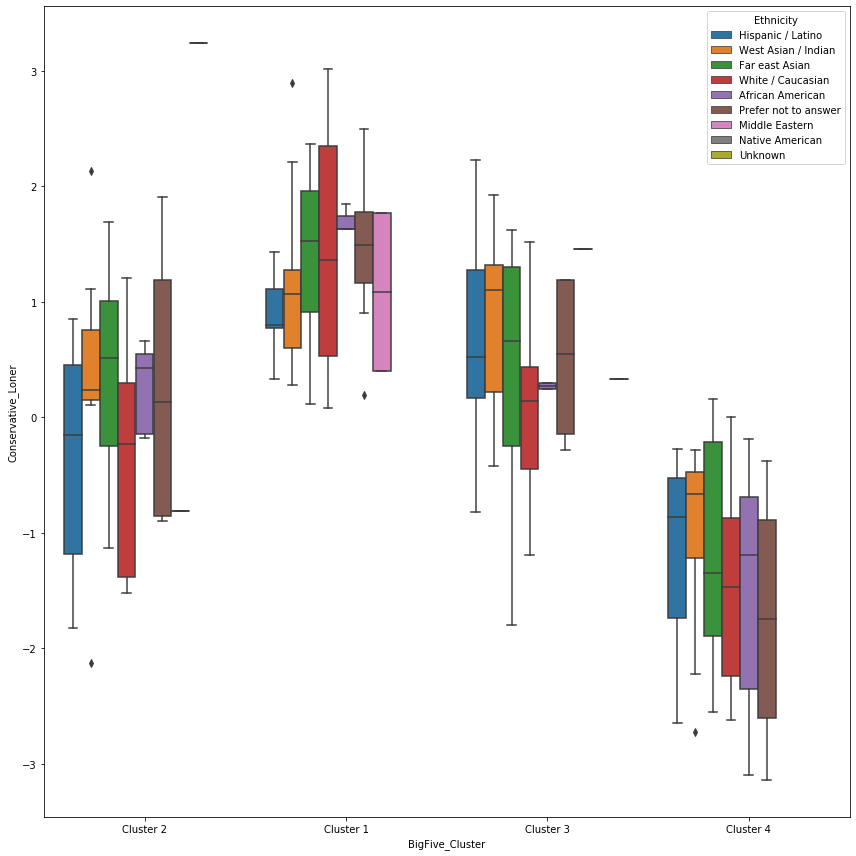

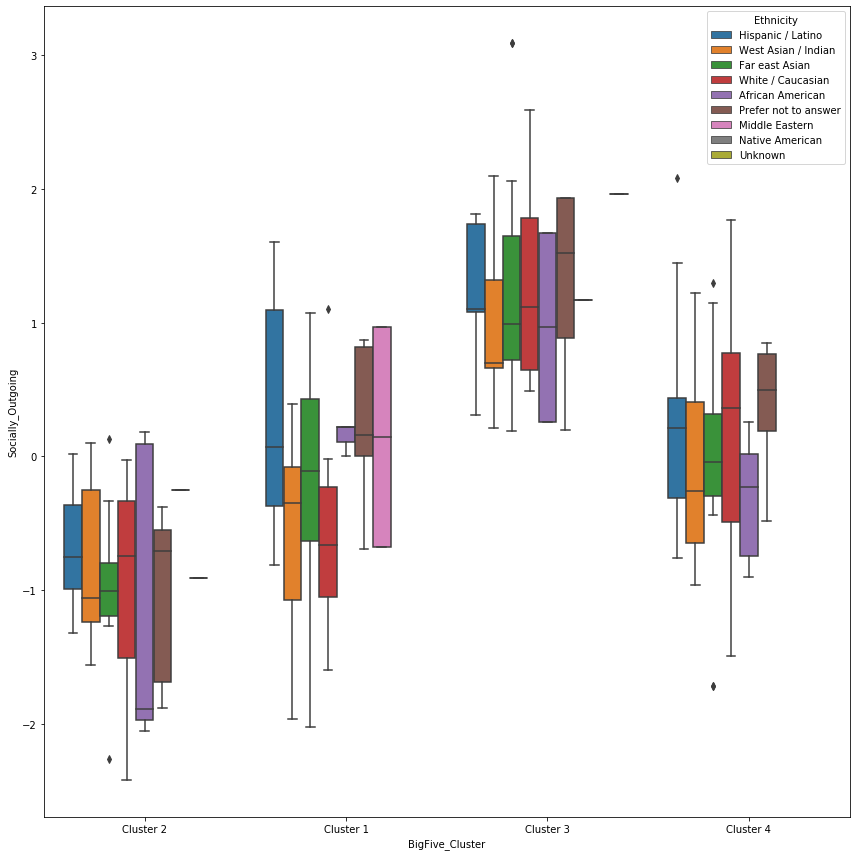

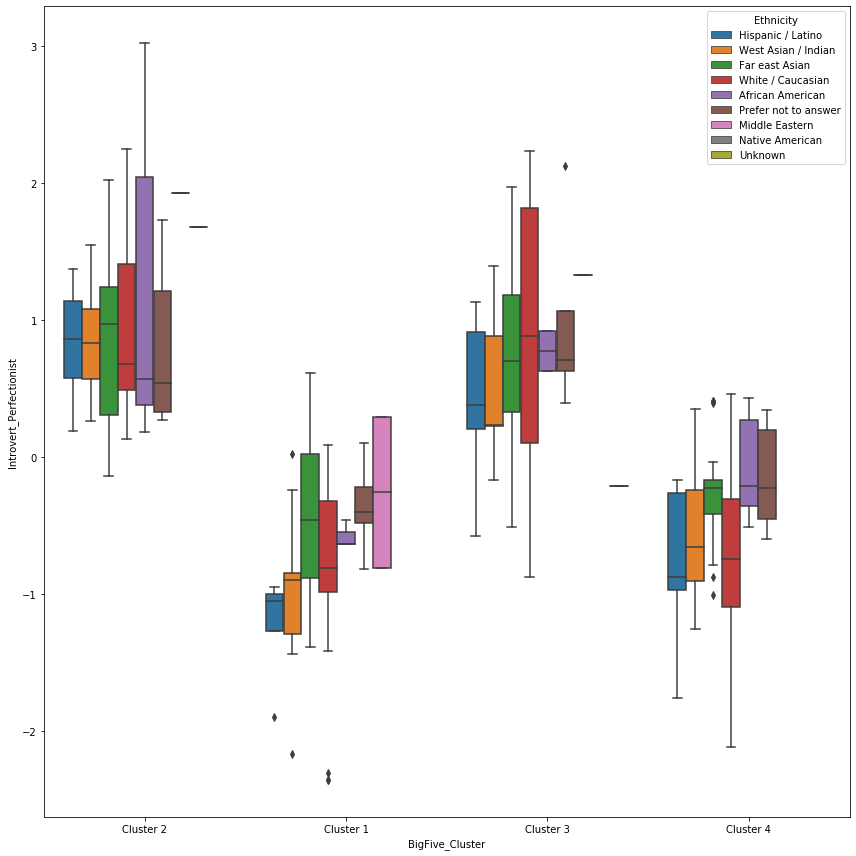

In [50]:
box("BigFive_Cluster", "Conservative_Loner", "Ethnicity",final_survey_df)
box("BigFive_Cluster", "Socially_Outgoing", "Ethnicity",final_survey_df)
box("BigFive_Cluster", "Introvert_Perfectionist", "Ethnicity",final_survey_df)

- Pattern shows each cluster's charactristics 


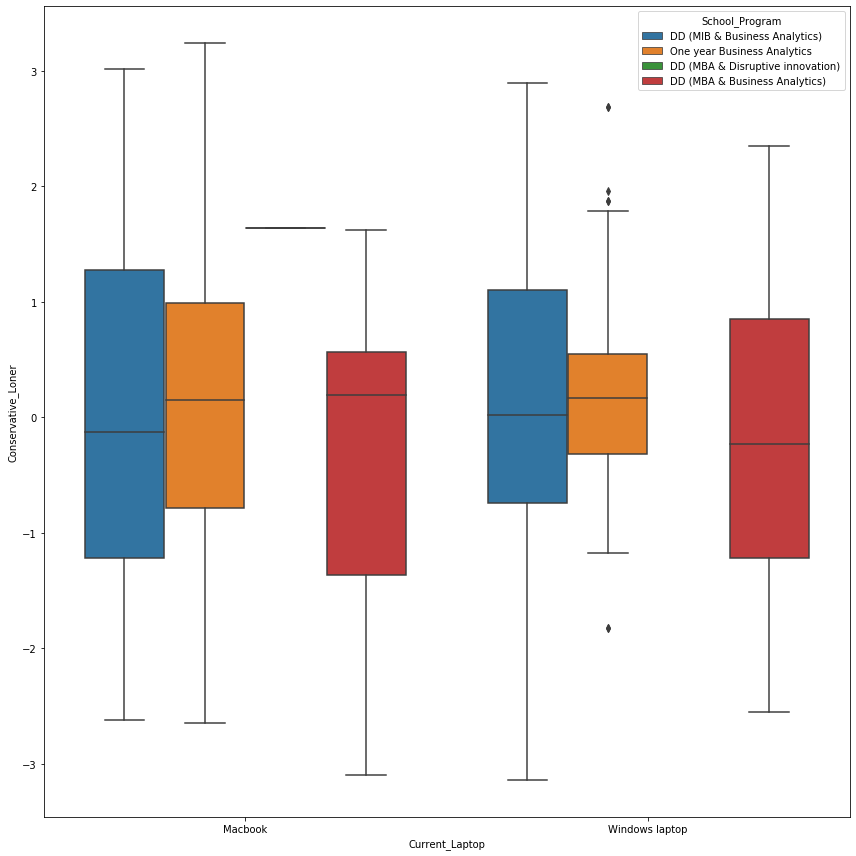

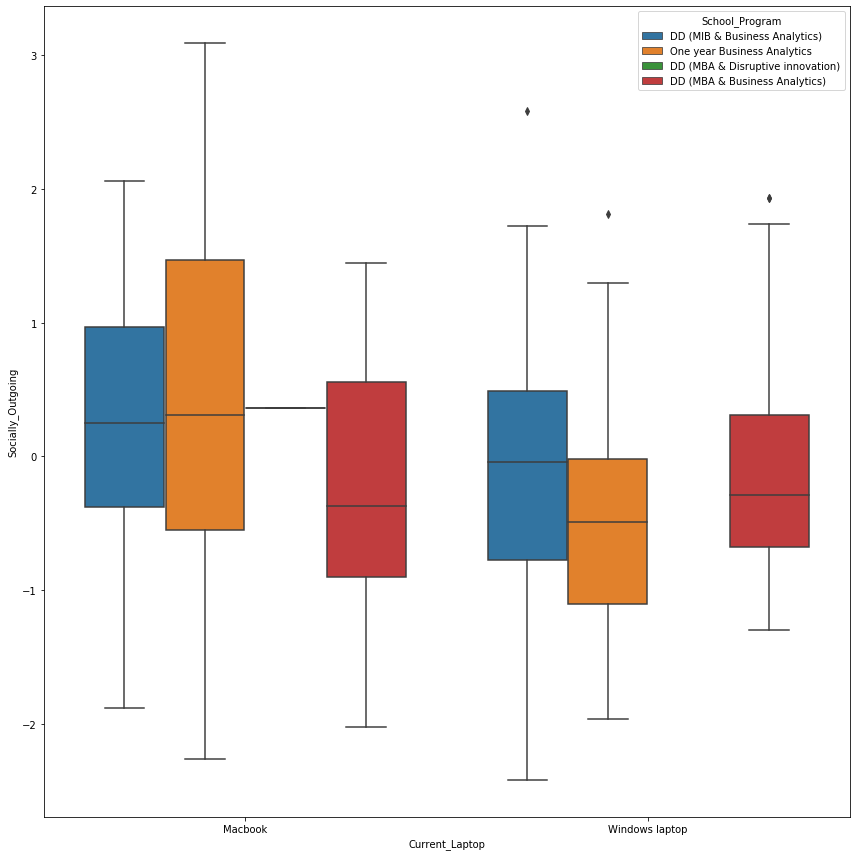

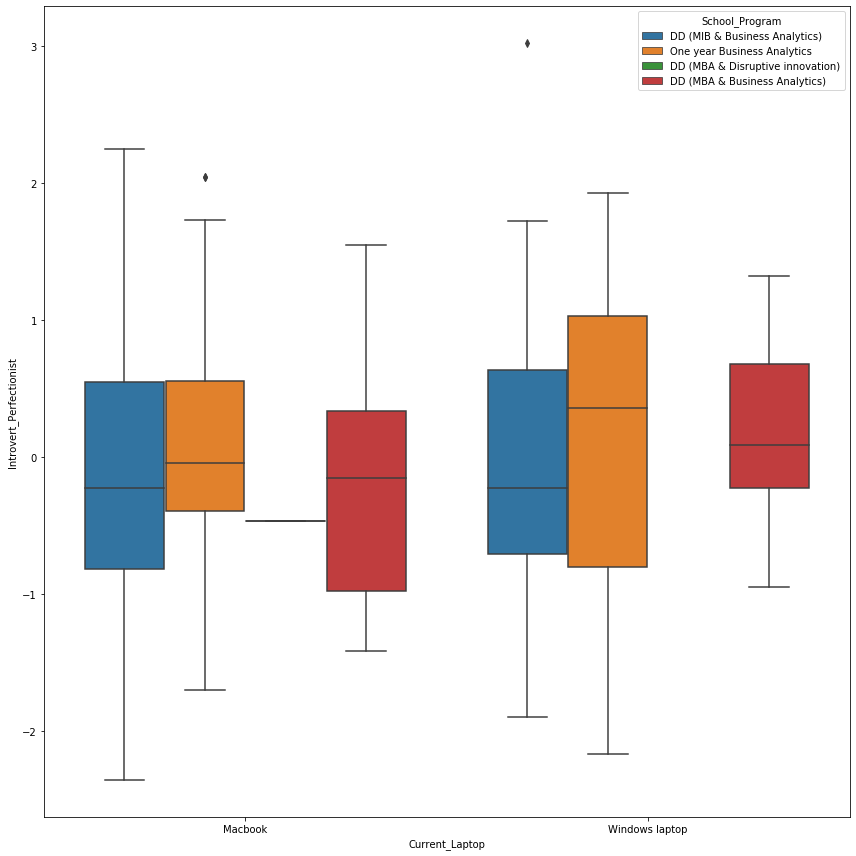

In [46]:
box("Current_Laptop", "Conservative_Loner", "School_Program", final_survey_df)
box("Current_Laptop", "Socially_Outgoing", "School_Program", final_survey_df)
box("Current_Laptop", "Introvert_Perfectionist", "School_Program", final_survey_df)